In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

/home/vale6811/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
%matplotlib inline

In [3]:
df1 = pd.read_csv('data/ch6/df1', index_col=0)
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [4]:
df2 = pd.read_csv('data/ch6/df2')
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


<Axes: >

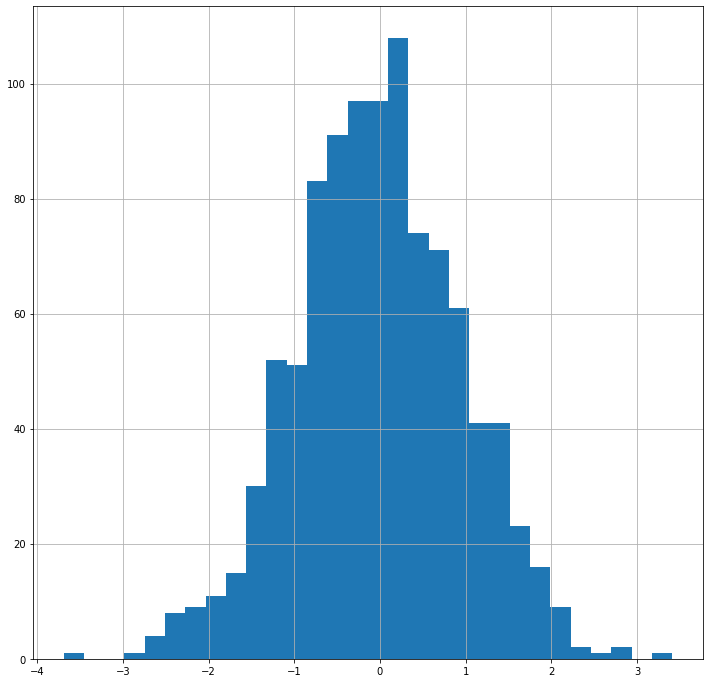

In [5]:
# bin represents the number of columns (i.e. bins where data is aggreagated)
df1['A'].hist(bins=30, figsize=(12,12))

<Axes: ylabel='Frequency'>

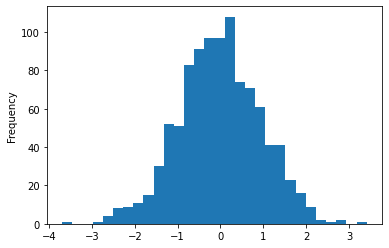

In [6]:
#
# basically all the plots can be created directly from the pandas df
# you can also specify  the function plot and the type of plot you want to do, e.g.
df1['A'].plot(kind='hist', bins=30)

<Axes: ylabel='Frequency'>

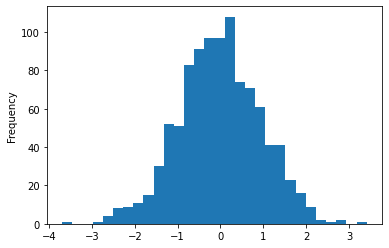

In [7]:
#
# you can also refer to the .plot object from the datafame and then call the specific plot function, e.g.
df1['A'].plot.hist(bins=30)

<Axes: >

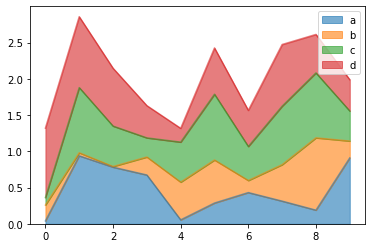

In [8]:
# there are many available plot types
df2.plot.area(alpha=0.6)

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008
5,0.286043,0.593465,0.907307,0.637898
6,0.430436,0.166230,0.469383,0.497701
7,0.312296,0.502823,0.806609,0.850519
8,0.187765,0.997075,0.895955,0.530390
9,0.908162,0.232726,0.414138,0.432007


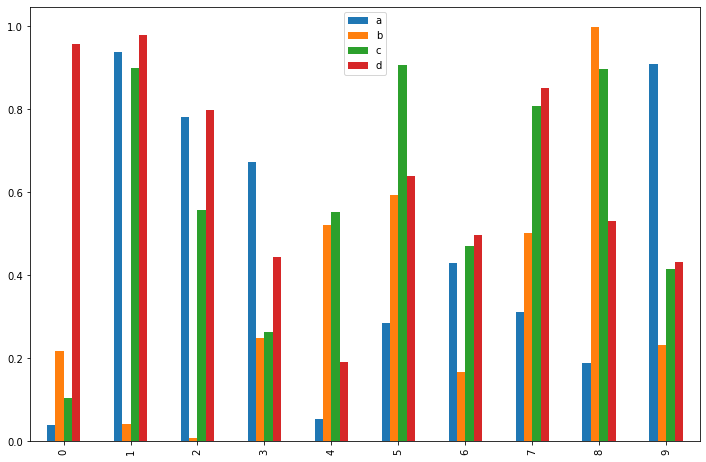

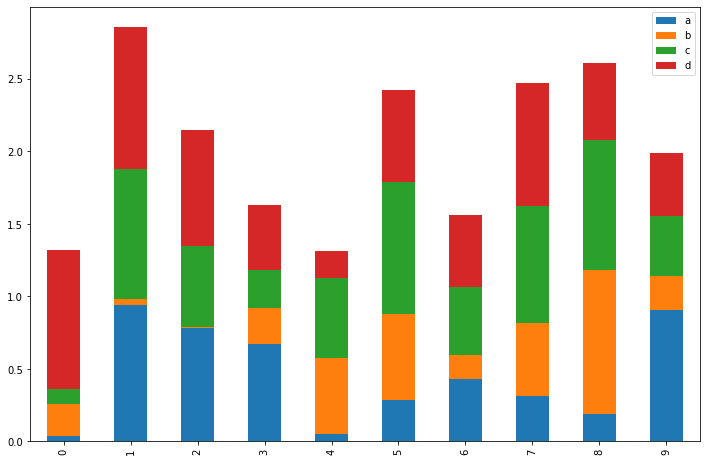

In [9]:
# this creaates a bar for each entry in the df.. in this case it works because it's very small df (only 9 rows)
df2.plot.bar(figsize=(12,8))

df2.plot.bar(figsize=(12,8), stacked=True)
df2.head(n=10)

<Axes: >

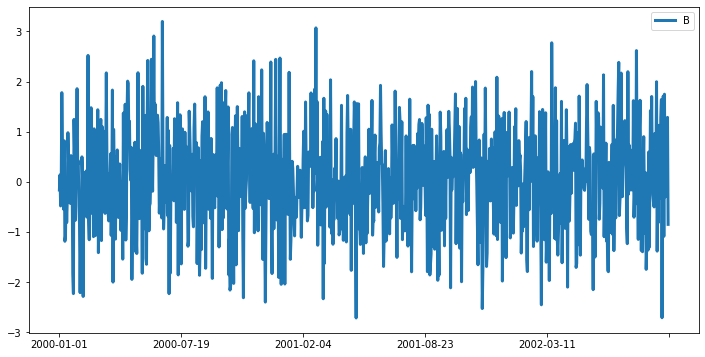

In [10]:
#
# for line graphs you need to select which column is x and which is y
# in this case (default) we use the index as x because this is a time series
# y is instead one of the column names
df1.head(n=10)
df1.plot.line(y='B', figsize=(12,6), lw=3)

/home/vale6811/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Axes: xlabel='A', ylabel='B'>

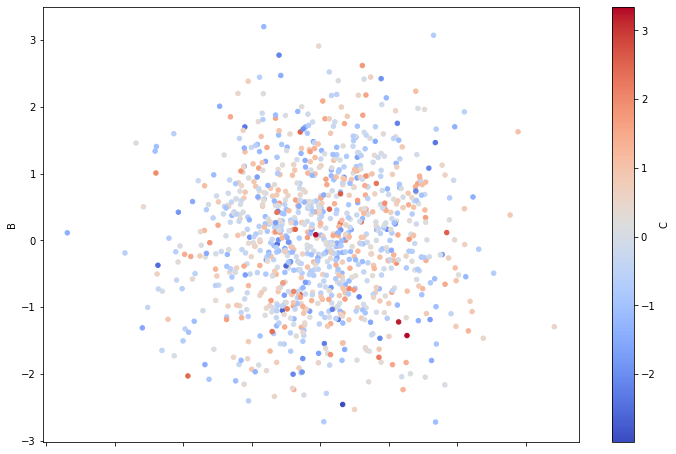

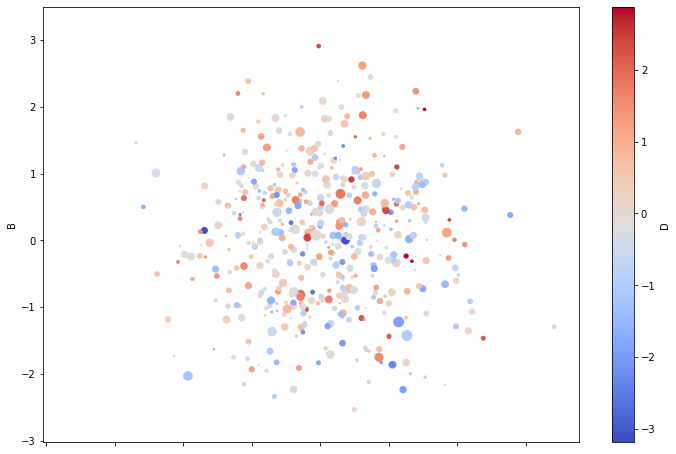

In [12]:
#
# in scatter plot we can assign a color to each point refrring to another column in the df
# a colormap can also be specified
df1.plot.scatter(x='A',y='B', c='C', figsize=(12,8), cmap='coolwarm')
#
# but you can specify additional information by size (same info from column C but shown by size)
df1.plot.scatter(x='A',y='B', s=df1['C']*30, c='D', cmap='coolwarm', figsize=(12,8))

<Axes: >

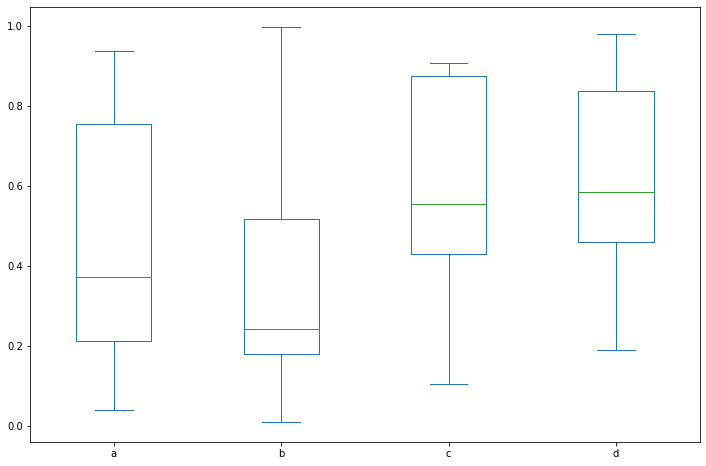

In [13]:
#
# BOX PLOTS
df2.plot.box(figsize=(12,8))


In [14]:
#
# her we create a new df with random data
df3 = pd.DataFrame(np.random.rand(1000,2), columns=['a','b'])
df3.head()

,a,b
0,0.620692,0.390863
1,0.987483,0.801655
2,0.863164,0.928322
3,0.566969,0.685504
4,0.557410,0.516463


<Axes: xlabel='a', ylabel='b'>

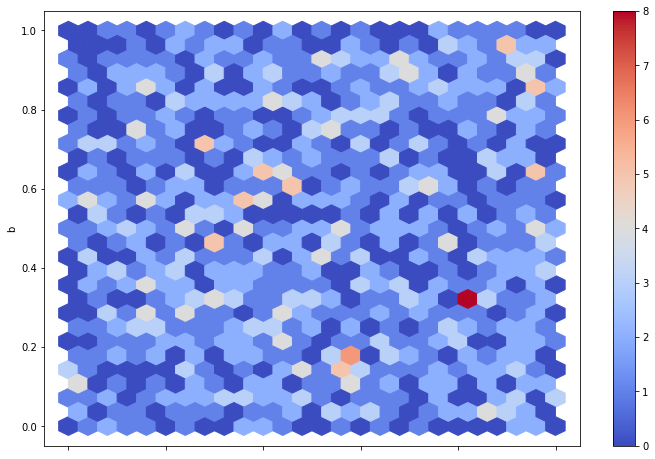

In [15]:
#
# this is like ascatter plot but uses hexagons instead of plots
# the color gets darker the more points are inside the hexagon area
# the hexagon area is changed by grid size
# and again you can decide on the color map
df3.plot.hexbin(x='a',y='b', gridsize=25, cmap='coolwarm', figsize=(12,8))

<Axes: ylabel='Density'>

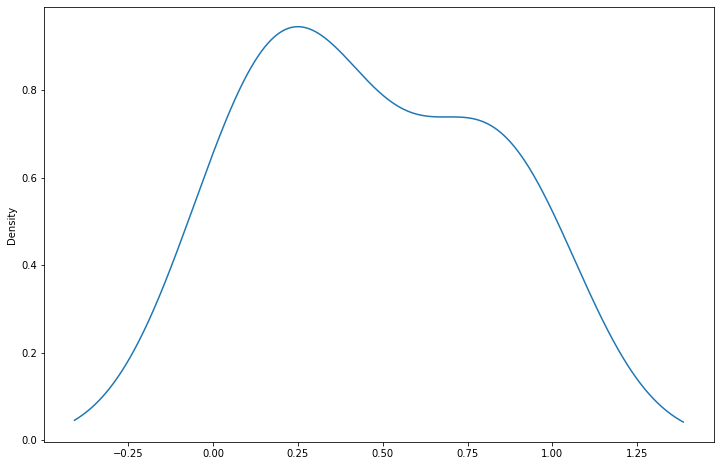

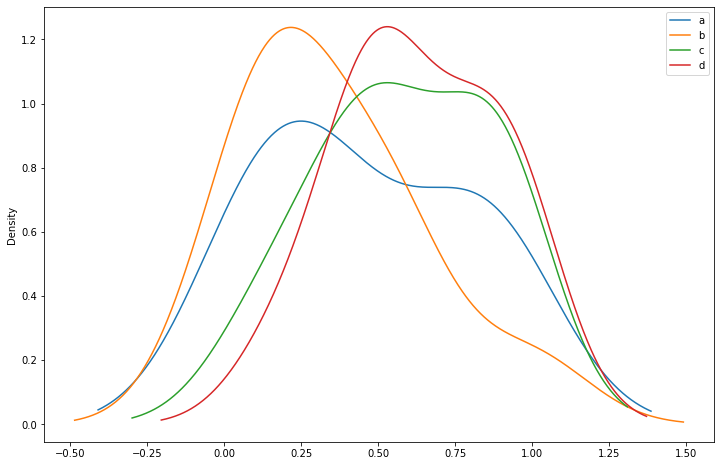

In [16]:
#
# kernel density estimation (this is the same as the density function)
df2['a'].plot.kde(figsize=(12,8))
#
# you can also run this for all the columns in the df
df2.plot.kde(figsize=(12,8))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

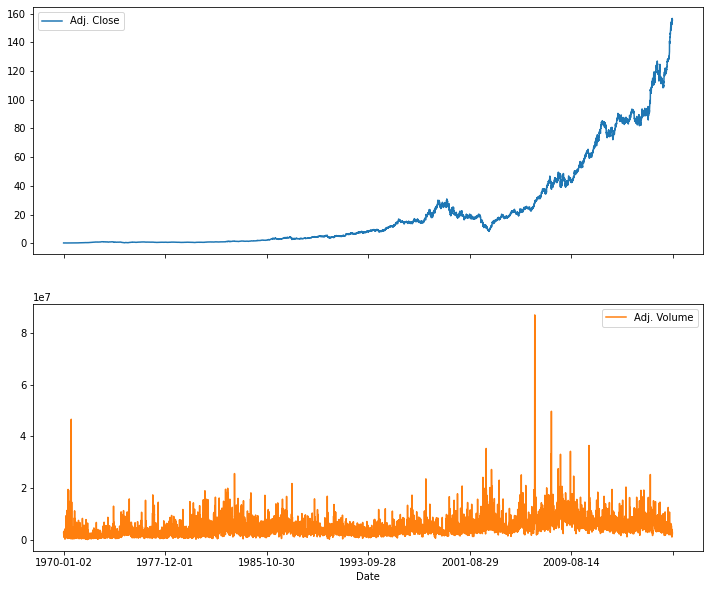

In [17]:
###############################################
##
##  TIME SERIES VISUALZATIONS
##
###############################################
mcdon = pd.read_csv('data/ch6/mcdonalds.csv',index_col=0)
mcdon.head()
#
# first thing to do is to put every colum in the same range or just plot one column at a time
# to avoid that data on different scales affect visualizations
mcdon.plot(subplots=True, figsize=(12,10))



before conversion
            Adj. Close  Adj. Volume
Date                               
1970-01-02    0.209761    2825604.0
1970-01-05    0.213316    2210449.5
1970-01-06    0.214501    1951168.5
1970-01-07    0.213316    2728768.5
1970-01-08    0.213316    2242404.0
1970-01-09    0.207391    3288033.0
1970-01-12    0.199095    2462440.5
1970-01-13    0.195540    2380792.5
1970-01-14    0.196109    1003954.5
1970-01-15    0.194971    1869642.0
after conversion
            Adj. Close  Adj. Volume   DayIndex
DayIndex                                      
1970-01-02    0.209761    2825604.0 1970-01-02
1970-01-05    0.213316    2210449.5 1970-01-05
1970-01-06    0.214501    1951168.5 1970-01-06
1970-01-07    0.213316    2728768.5 1970-01-07
1970-01-08    0.213316    2242404.0 1970-01-08
1970-01-09    0.207391    3288033.0 1970-01-09
1970-01-12    0.199095    2462440.5 1970-01-12
1970-01-13    0.195540    2380792.5 1970-01-13
1970-01-14    0.196109    1003954.5 1970-01-14
1970-01-15    0.

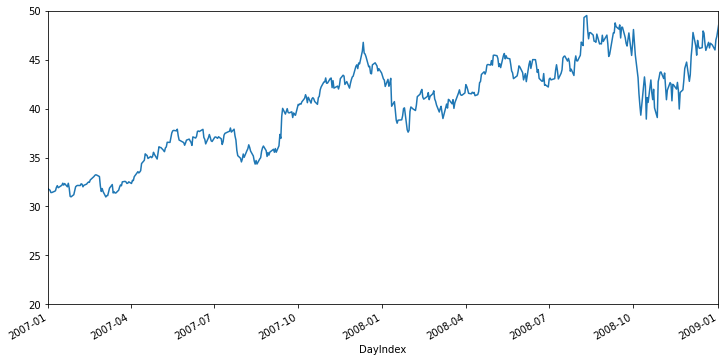

In [18]:
#
# we can set the xlim to temporal values
# bu sometime you have to convert the string to a pandas dateTime value
# however note that the y limit remains the same as the full time series was consdiered
print("before conversion")
print(mcdon.head(n=10))
mcdon['DayIndex'] = pd.to_datetime(mcdon.index)
mcdon.index = mcdon['DayIndex']
mcdon['Adj. Close'].plot(xlim=['2007-01-01','2009-01-01'], ylim=[20,50], figsize=(12,6))
print("after conversion")
print(mcdon.head(n=10))
#
# even if the before and after index lok the same, it was not working properly with the original index

In [4]:
#
# matplotlib dates library
# Used to convert/change x ticks (Dates)
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import pandas as pd
#
# let's get back the original df
mcdon = pd.read_csv('data/ch6/mcdonalds.csv',index_col=0)
mcdon['DayIndex'] = pd.to_datetime(mcdon.index)   # YOU STILL POSSIBLY NEED TO CONVERT IT TO A PANDAS DATE
mcdon.index = mcdon['DayIndex']

idx = mcdon.index # if youw ant to get the whole index
limited_idx = mcdon.loc['2007-01-01':'2007-04-28'].index
limited_idx



/home/vale6811/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


DatetimeIndex(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
               '2007-01-09', '2007-01-10', '2007-01-11', '2007-01-12',
               '2007-01-16', '2007-01-17', '2007-01-18', '2007-01-19',
               '2007-01-22', '2007-01-23', '2007-01-24', '2007-01-25',
               '2007-01-26', '2007-01-29', '2007-01-30', '2007-01-31',
               '2007-02-01', '2007-02-02', '2007-02-05', '2007-02-06',
               '2007-02-07', '2007-02-08', '2007-02-09', '2007-02-12',
               '2007-02-13', '2007-02-14', '2007-02-15', '2007-02-16',
               '2007-02-20', '2007-02-21', '2007-02-22', '2007-02-23',
               '2007-02-26', '2007-02-27', '2007-02-28', '2007-03-01',
               '2007-03-02', '2007-03-05', '2007-03-06', '2007-03-07',
               '2007-03-08', '2007-03-09', '2007-03-12', '2007-03-13',
               '2007-03-14', '2007-03-15', '2007-03-16', '2007-03-19',
               '2007-03-20', '2007-03-21', '2007-03-22', '2007-03-23',
      

In [21]:
#
# here we get the matching info for stockes
# basically we've split dates (X) and stocks (Y) into 2 different "arrays"
stock = mcdon.loc['2007-01-01':'2007-04-28']['Adj. Close']
stock.head()


DayIndex
2007-01-03    31.662754
2007-01-04    31.424580
2007-01-05    31.424580
2007-01-08    31.547276
2007-01-09    31.605015
Name: Adj. Close, dtype: float64

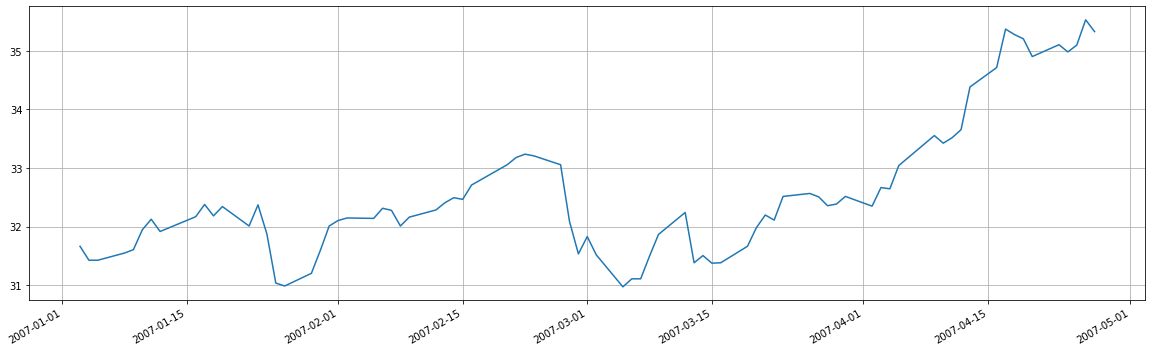

In [22]:
fig, ax = plt.subplots(figsize=(20,6))

ax.plot_date(limited_idx, stock, '-')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
fig.autofmt_xdate()  # this will automatically fomat x and y axis to make the m look nice
#plt.tight_layout()

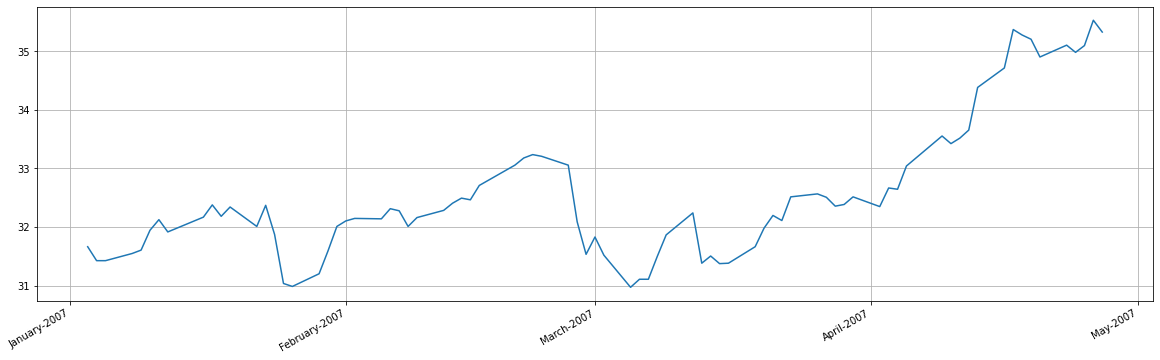

In [23]:
#
# To improve readablity or change the set of ticks on the time axis we need to change 2 things:
# 1. set the major/minor locator
# 2. set the major/minor formatter
# IMPORTANT.. REMEMBER THAT WE CONVERTED THE INDEX TO PANDAS DATE.. OR THIS MIGHT NOT WORK!!
fig, ax = plt.subplots(figsize=(20,6))

ax.plot_date(limited_idx, stock, '-')
# 1.
ax.xaxis.set_major_locator(dates.MonthLocator())
#
# 2. SPECIFIES THE FORMAT: these codes are normal time formatting string codes
ax.xaxis.set_major_formatter(dates.DateFormatter('%B-%Y'))
ax.xaxis.grid(True)
ax.yaxis.grid(True)
fig.autofmt_xdate()  # this will automatically fomat x and y axis to make the m look nice
#plt.tight_layout()


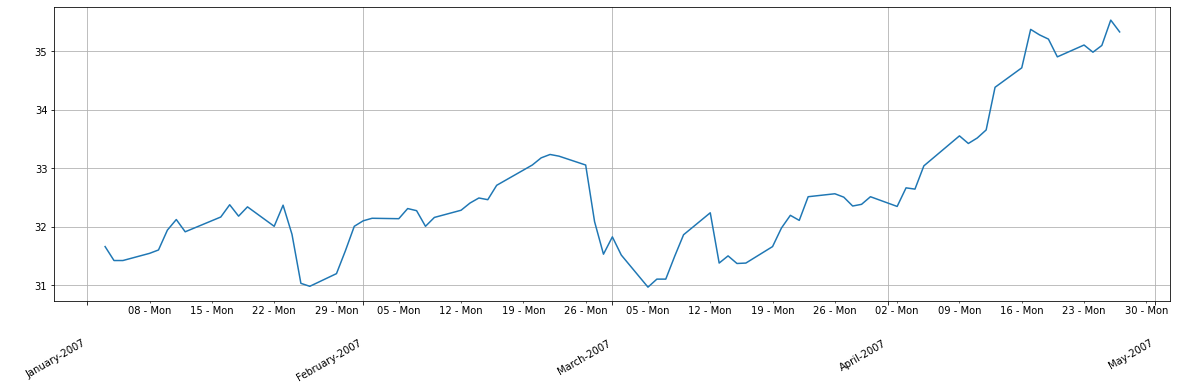

In [24]:
#
# note that thanks to the formatter you can add new lines
# also note that you have a major and a minor formatter
# the major is the bigger more distant ones (e.g. months)
# the minor s the closer more precise one (e.g. days/weeks)
fig, ax = plt.subplots(figsize=(20,6))

ax.plot_date(limited_idx, stock, '-')
# 1.
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))  # byWeekday=0 means starts at monday
#
# 2. SPECIFIES THE FORMAT: these codes are normal time formatting string codes
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%B-%Y'))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d - %a'))
ax.xaxis.grid(True)
ax.yaxis.grid(True)
fig.autofmt_xdate()  # this will automatically fomat x and y axis to make the m look nice
#plt.tight_layout()


In [1]:
#
# INTERACTIVE PLOTS
#
# RESTART THE KERNEL AND INSTEAD OF USING %matplotlib inline 
# USE %matplotlib notebook
# OR  %matplotlib widget 
# they require ipympl library
# note that this breaks almost all the other graphs..

%matplotlib widget
#%matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import pandas as pd
#
# let's get back the original df
mcdon = pd.read_csv('data/ch6/mcdonalds.csv',index_col=0)
mcdon['DayIndex'] = pd.to_datetime(mcdon.index)   # YOU STILL POSSIBLY NEED TO CONVERT IT TO A PANDAS DATE
mcdon.index = mcdon['DayIndex']

idx = mcdon.index # if youw ant to get the whole index
limited_idx = mcdon.loc['2007-01-01':'2007-04-28'].index
limited_idx

/home/vale6811/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


DatetimeIndex(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
               '2007-01-09', '2007-01-10', '2007-01-11', '2007-01-12',
               '2007-01-16', '2007-01-17', '2007-01-18', '2007-01-19',
               '2007-01-22', '2007-01-23', '2007-01-24', '2007-01-25',
               '2007-01-26', '2007-01-29', '2007-01-30', '2007-01-31',
               '2007-02-01', '2007-02-02', '2007-02-05', '2007-02-06',
               '2007-02-07', '2007-02-08', '2007-02-09', '2007-02-12',
               '2007-02-13', '2007-02-14', '2007-02-15', '2007-02-16',
               '2007-02-20', '2007-02-21', '2007-02-22', '2007-02-23',
               '2007-02-26', '2007-02-27', '2007-02-28', '2007-03-01',
               '2007-03-02', '2007-03-05', '2007-03-06', '2007-03-07',
               '2007-03-08', '2007-03-09', '2007-03-12', '2007-03-13',
               '2007-03-14', '2007-03-15', '2007-03-16', '2007-03-19',
               '2007-03-20', '2007-03-21', '2007-03-22', '2007-03-23',
      

<Axes: xlabel='DayIndex'>

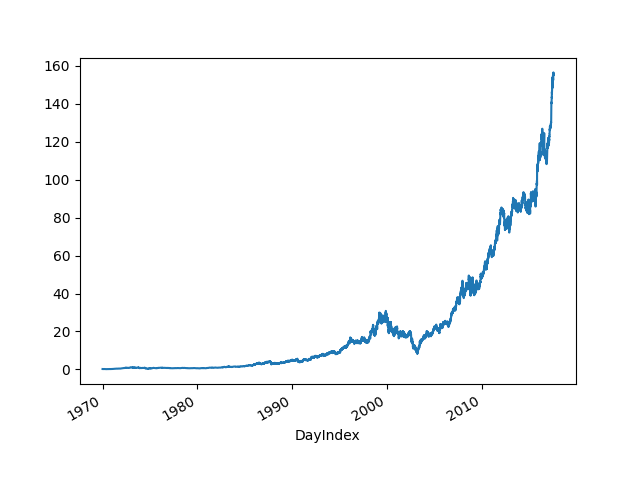

In [2]:
mcdon['Adj. Close'].plot()
# you can change the size of the plot
# zoom 
# get interactive values etc..